In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_loss_gnn = pd.read_csv("results/gnn/epoch_loss.csv")
df_loss_contconv = pd.read_csv("results/contconv/epoch_loss.csv")

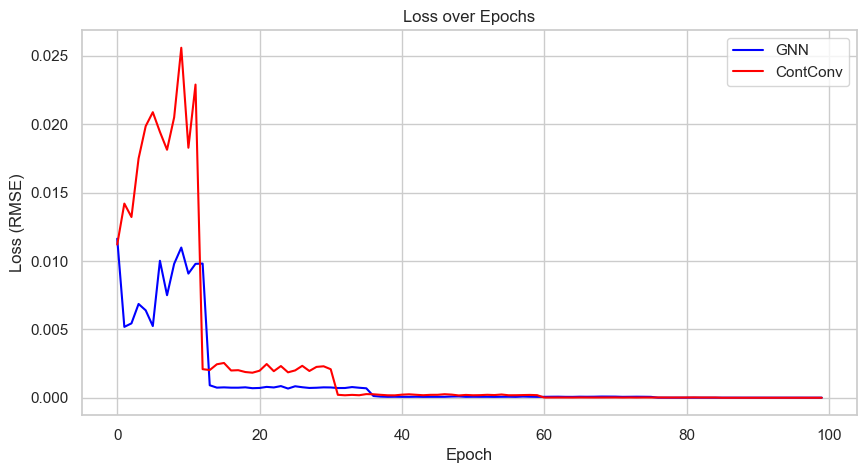

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
plt.plot(df_loss_gnn["loss"] / 1e6, label="GNN", color="blue")
plt.plot(df_loss_contconv["loss"] / 1e6, label="ContConv", color="red")
plt.xlabel("Epoch")
plt.ylabel("Loss (RMSE)")
plt.title("Loss over Epochs")
plt.legend()
plt.savefig("figures/loss.png", dpi=400)
plt.show()

In [5]:
df_stepwise_gnn = pd.read_csv("results/gnn/test_results_stepwise.csv")
df_stepwise_contconv = pd.read_csv("results/contconv/test_results_stepwise.csv")
sims_gt = pd.read_csv("data/test/output_file_1.csv")[["scene", "step", "step_time"]]
mean_step_time = sims_gt.groupby("scene").mean()["step_time"]
n_bodies = [3, 25, 50, 100, 250, 500]

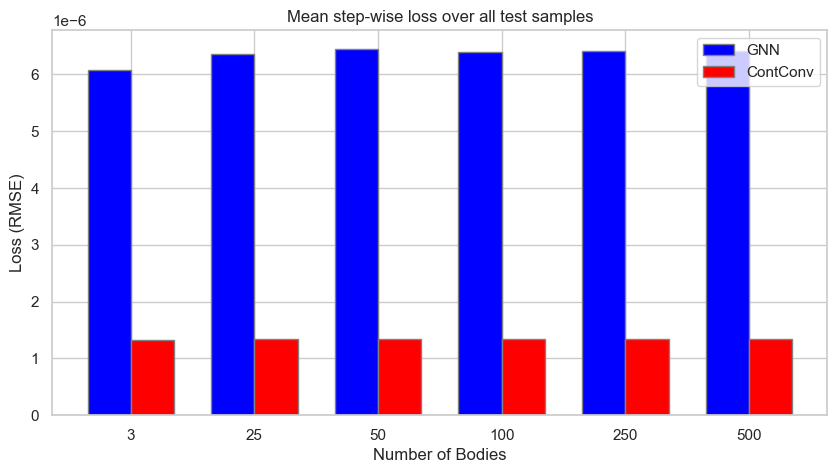

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
barWidth = 0.35

bars1 = df_stepwise_gnn["loss"]
bars2 = df_stepwise_contconv["loss"]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color="blue", width=barWidth, edgecolor="grey", label="GNN")
plt.bar(r2, bars2, color="red", width=barWidth, edgecolor="grey", label="ContConv")
plt.xticks([r + barWidth / 2 for r in range(len(bars1))], n_bodies)
plt.xlabel("Number of Bodies")
plt.ylabel("Loss (RMSE)")
plt.title("Mean step-wise loss over all test samples")
plt.legend()
plt.savefig("figures/stepwise_loss.png", dpi=400)
plt.show()

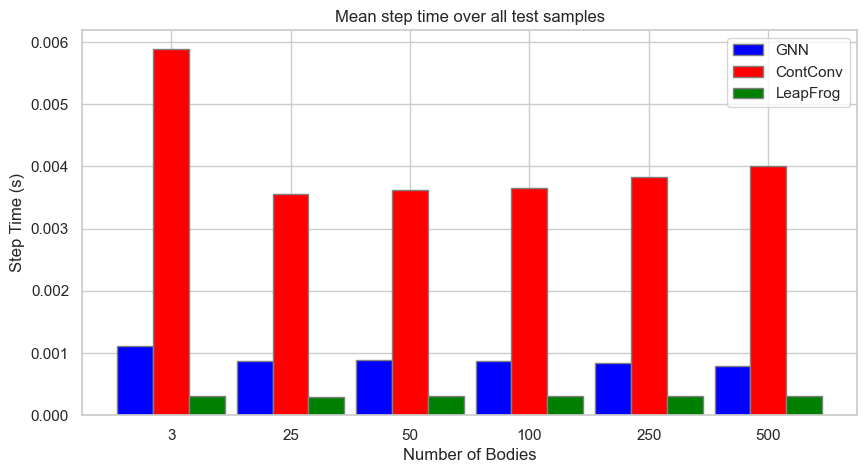

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
barWidth = 0.3

bars1 = df_stepwise_gnn["step_time"]
bars2 = df_stepwise_contconv["step_time"]
bars3 = mean_step_time
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


plt.bar(r1, bars1, color="blue", width=barWidth, edgecolor="grey", label="GNN")
plt.bar(r2, bars2, color="red", width=barWidth, edgecolor="grey", label="ContConv")
plt.bar(r3, bars3, color="green", width=barWidth, edgecolor="grey", label="LeapFrog")
plt.xticks([r + barWidth for r in range(len(bars1))], n_bodies)
plt.xlabel("Number of Bodies")
plt.ylabel("Step Time (s)")
plt.title("Mean step time over all test samples")
plt.legend()
plt.savefig("figures/stepwise_time.png", dpi=400)
plt.show()

In [8]:
df_rollout_gnn = pd.read_csv("results/gnn/test_results_rollout.csv")
df_rollout_contconv = pd.read_csv("results/contconv/test_results_rollout.csv")
n_bodies = [3, 25, 50, 100, 250, 500]
names = ["Position", "Velocity", "Acceleration"]

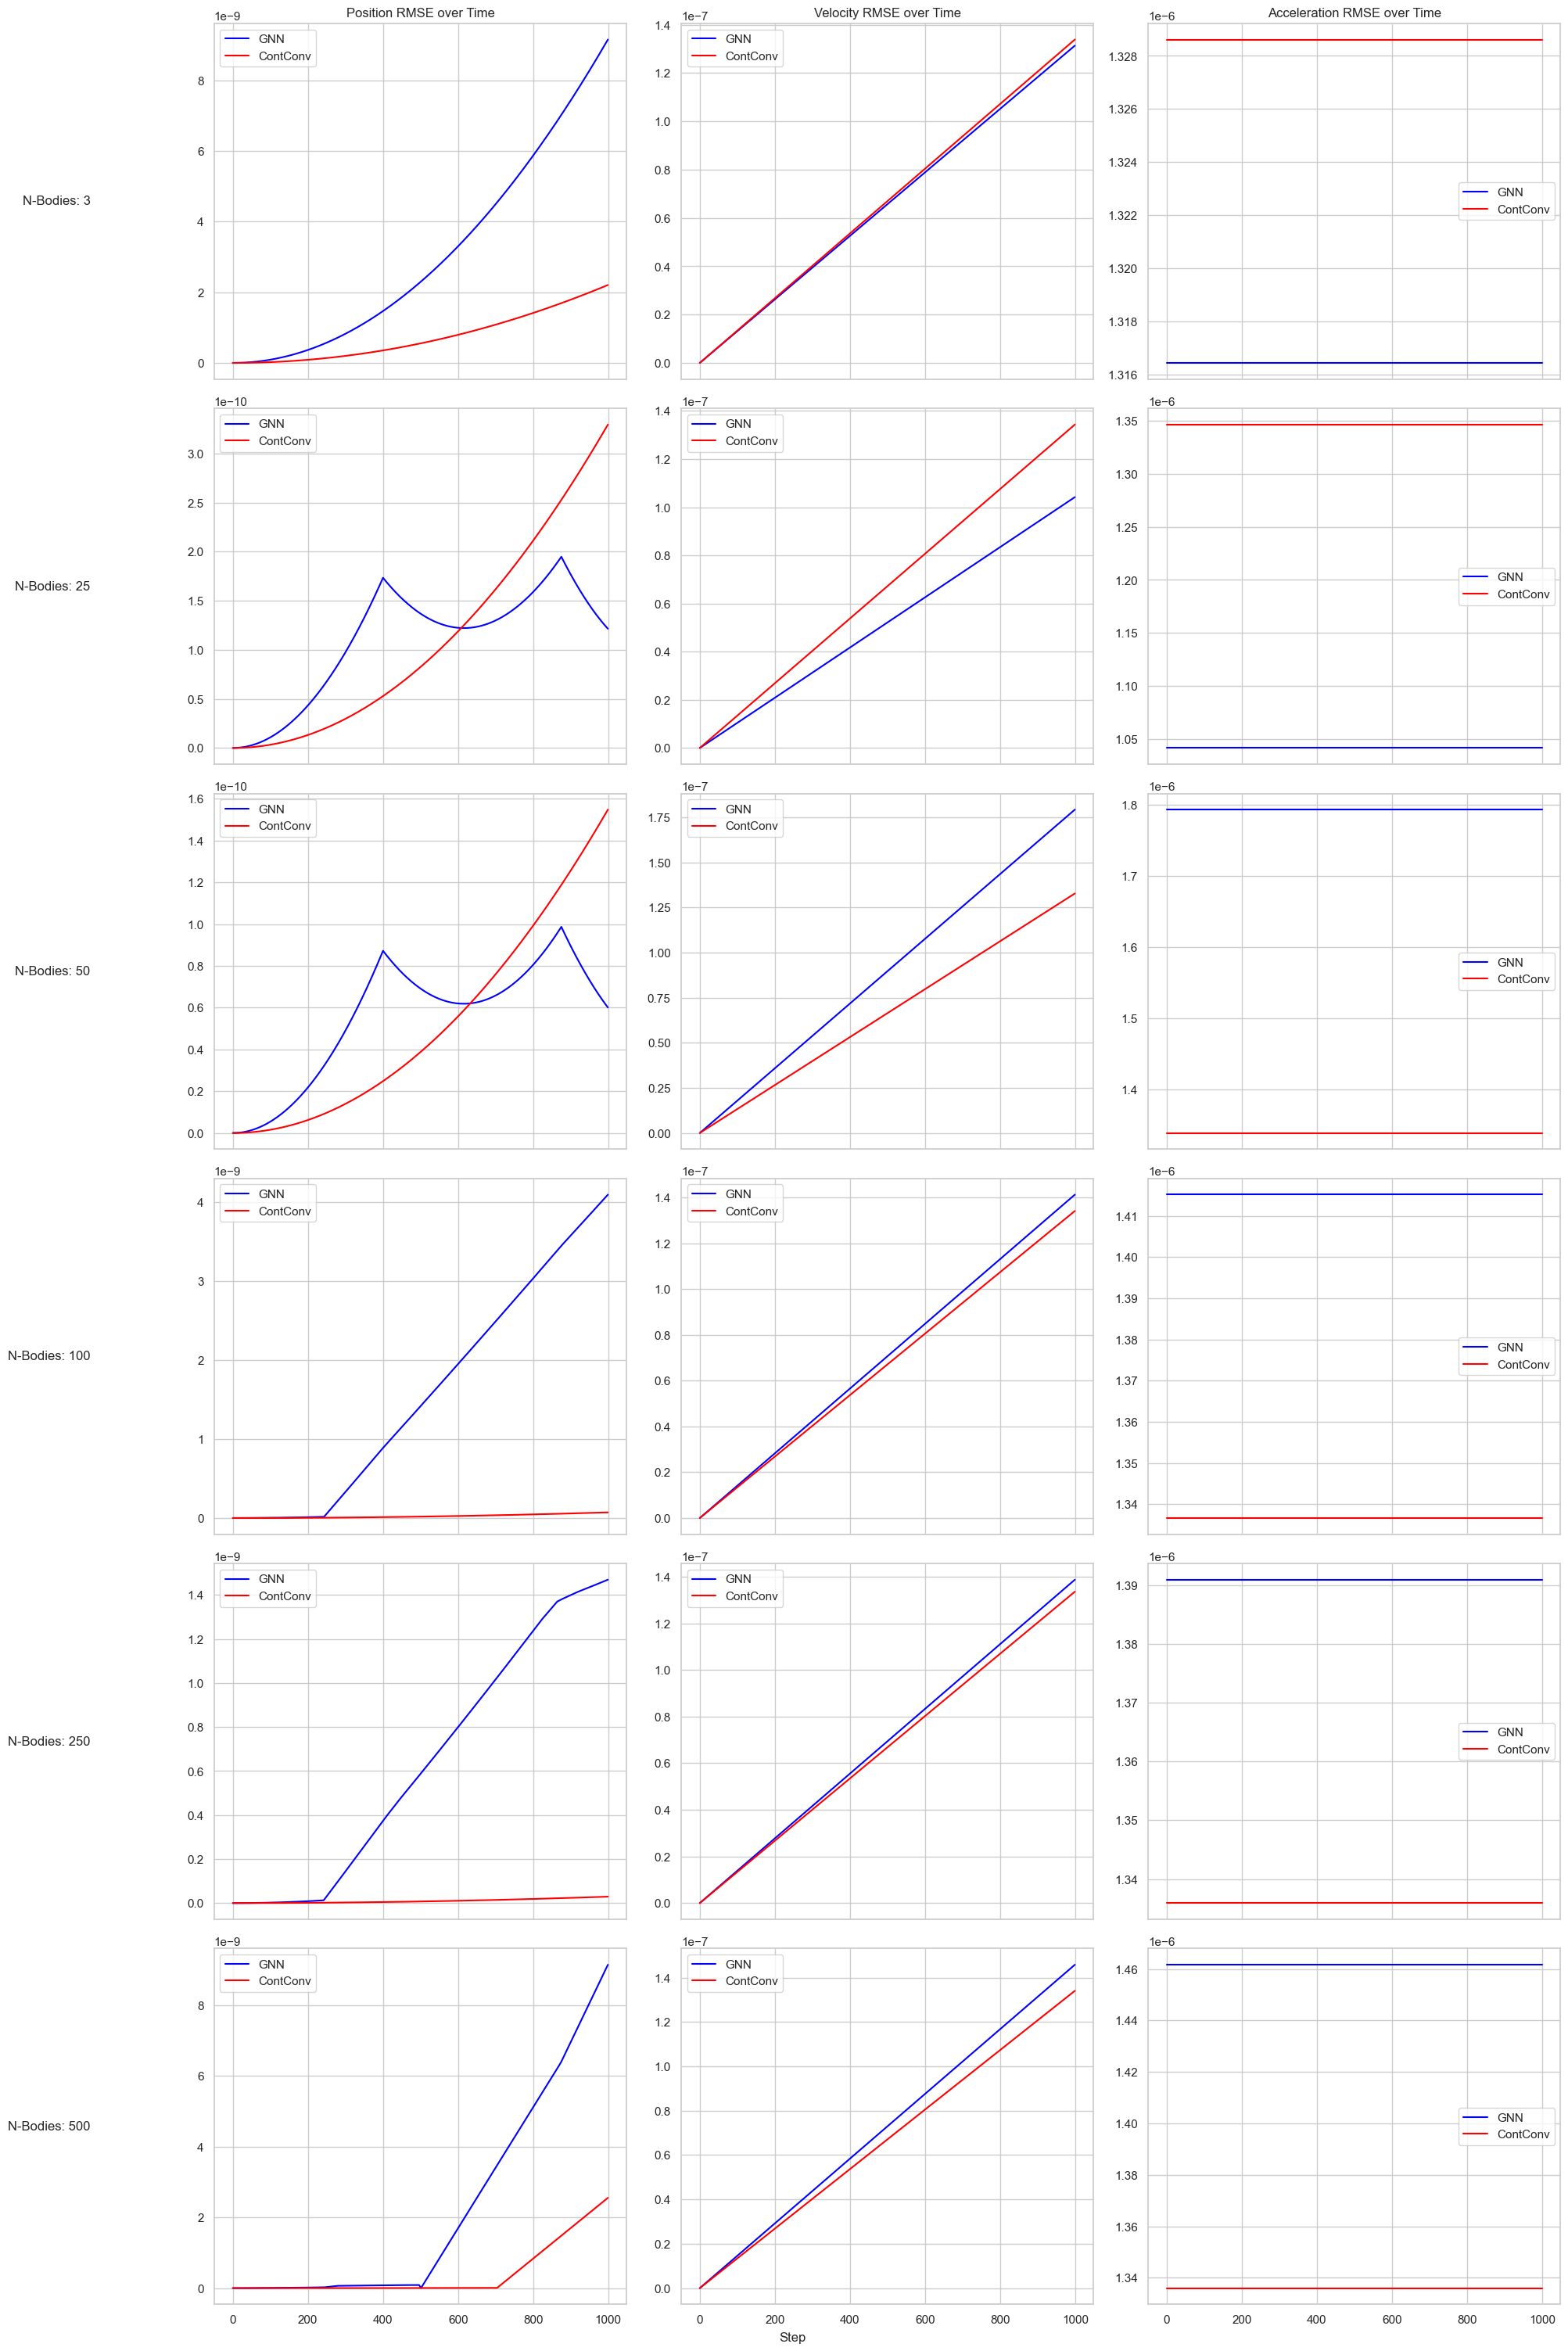

In [9]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(6, 3, figsize=(20, 30), sharex=True)

for i, (scene, n_body) in enumerate(zip(df_rollout_gnn["scene"].unique(), n_bodies)):
    df_rollout_gnn_scene = df_rollout_gnn[df_rollout_gnn["scene"] == scene]
    df_rollout_contconv_scene = df_rollout_contconv[
        df_rollout_contconv["scene"] == scene
    ]

    for j, metric in enumerate(["pos_rmse", "vel_rmse", "acc_rmse"]):
        ax = axs[i, j]
        ax.plot(
            df_rollout_gnn_scene["step"],
            df_rollout_gnn_scene[metric],
            label="GNN",
            color="blue",
        )
        ax.plot(
            df_rollout_contconv_scene["step"],
            df_rollout_contconv_scene[metric],
            label="ContConv",
            color="red",
        )
        if i == 0:
            ax.set_title(f"{names[j]} RMSE over Time")
        ax.legend()

    axs[i, 0].annotate(
        f"N-Bodies: {n_body}",
        xy=(-0.3, 0.5),
        xycoords="axes fraction",
        va="center",
        ha="right",
        fontsize=12,
        rotation=0,
    )

fig.text(0.5, 0.001, "Step", ha="center", va="center")

plt.tight_layout()
plt.savefig("figures/rollout.png", dpi=400)
plt.show()